# Final Project Part 2_EDA

I changed my dataset from credit transaction fraud to medical cost because I realize that linear regression is easier for me to do at this stage of my data science study (anomaly detection is a little ambicious). The purpose of new project is to predict medical charges (target variable) based on sex, BMI, number of children, smoker and region using supervised linear regression machine learning.

## Import libraries and dataset

In [48]:
# import all neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [49]:
# import dataset
insurance = pd.read_csv('insurance.csv')

In [50]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Explore the dataset

In [51]:
# check columns (what they are and what data types)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [52]:
# shape of the data, number of rows
insurance.shape

(1338, 7)

In [54]:
# replace non-numerical columns
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(insurance.sex.drop_duplicates()) 
insurance.sex = le.transform(insurance.sex)
# smoker or not
le.fit(insurance.smoker.drop_duplicates()) 
insurance.smoker = le.transform(insurance.smoker)
#region
le.fit(insurance.region.drop_duplicates()) 
insurance.region = le.transform(insurance.region)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


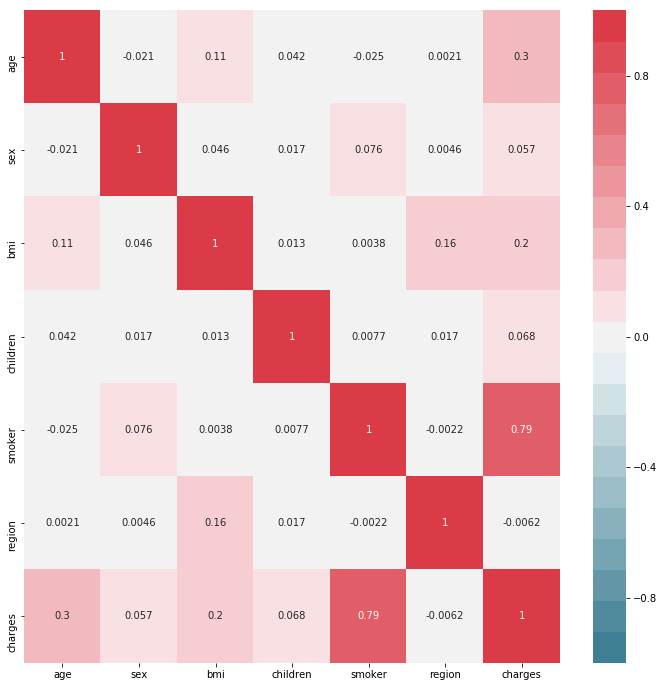

In [55]:
# visualize correlations using seaborn on a heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(
    insurance.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
);

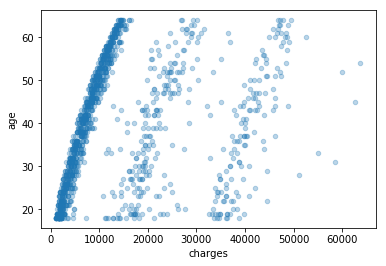

In [56]:
# check the how charges chages as age, sex, BMI, children, smoker and region
insurance.plot(kind='scatter', x='charges', y='age',alpha=0.3)

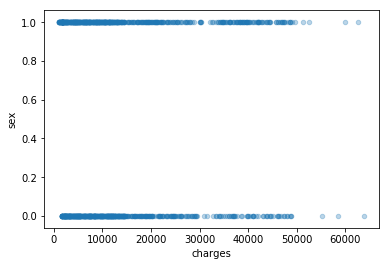

In [57]:
insurance.plot(kind='scatter', x='charges', y='sex',alpha=0.3)

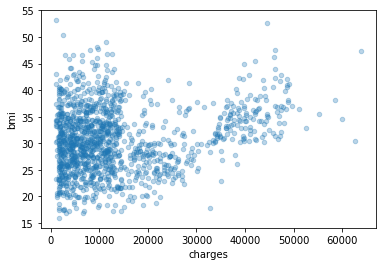

In [58]:
insurance.plot(kind='scatter', x='charges', y='bmi',alpha=0.3)

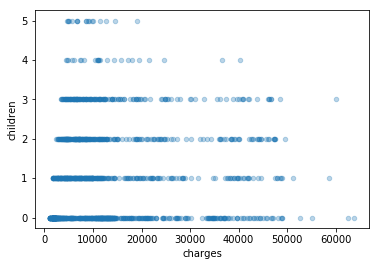

In [59]:
insurance.plot(kind='scatter', x='charges', y='children',alpha=0.3)

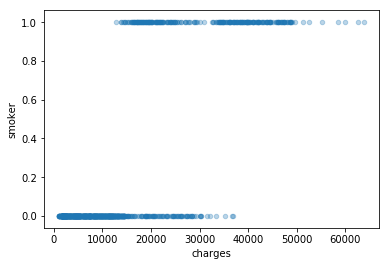

In [60]:
insurance.plot(kind='scatter', x='charges', y='smoker',alpha=0.3)

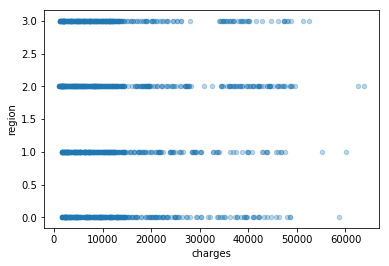

In [61]:
insurance.plot(kind='scatter', x='charges', y='region',alpha=0.3)

## Apply linear regression 

In [65]:
# select target variable and properties deciding the target variable 
feature_col = ['age','sex','bmi','children','smoker']
target_col = ['charges']
X = insurance.loc[:,feature_col]
y = insurance.loc[:,target_col]

In [69]:
# split both X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)
# check train and test sets
print('X_train dimension:',X_train.shape)
print('X_test dimension:',X_test.shape)
print('y_train dimension:',y_train.shape)
print('y_test dimension:',y_test.shape)

X_train dimension: (1003, 5)
X_test dimension: (335, 5)
y_train dimension: (1003, 1)
y_test dimension: (335, 1)


In [72]:
# use linear regression to fit and score the data
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7026502174285723

In [85]:
# how is the "score" comparing to root mean square?
from sklearn import metrics
metrics.mean_squared_error(y_test,lr.predict(X_test))


41681513.6014378